In [35]:
# Vamos a utilizar el dataset de la publicidad de un canal de TV, Radio y Prensa
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

In [10]:
data = pd.read_csv("../datasets/ads/Advertising.csv")
data.head()

# Este dataset tiene el gastado en publicidad en TV, Radio y Prensa y las ventas de un producto
# Vamos a buscar una relación lineal entre el gasto de TV y las ventas 
# La formula es la variable dependiente ~ variables independientes
# El metodo fit() nos devuelve un objeto con los resultados del modelo
lm = smf.ols(formula="Sales~TV", data=data).fit()
# Nos entrega un objeto con los resultados del modelo
lm.params
# El modelo lineal seria Sales = 7.032594 + 0.047537*TV
# El intercepto es 7.032594 y la pendiente es 0.047537

# Un incremento de 100 en gasto de TV, se traduciria como 4.7 ventas adicionales


Intercept    7.032594
TV           0.047537
dtype: float64

In [11]:
lm.pvalues
# Los p-valores son muy bajos, por lo que podemos rechazar la hipotesis nula

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [13]:
lm.rsquared
# Que el valor de R2 sea 0.612 significa que el 61.2% de la variabilidad de las ventas

0.611875050850071

In [14]:
# Tambien podemos generar un resumen
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        19:58:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

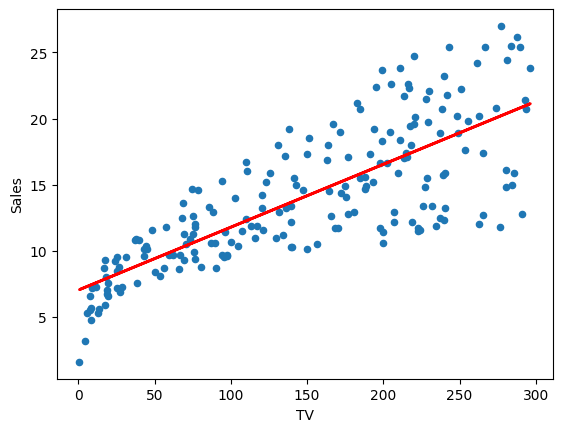

In [16]:
sales_pred = lm.predict(data["TV"])
import matplotlib.pyplot as plt
data.plot(kind="scatter", x="TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth=2)
# Tenemos un modelo lineal que se ajusta a los datos
# Y los puntos tienden a formar una linea recta
# Por lo tanto podemos decir que existe una relacion lineal entre el gasto en TV y las ventas

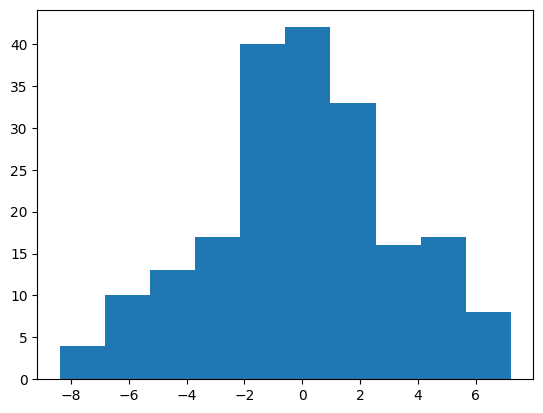

In [20]:
# Error estandar de los residuos
plt.hist(lm.resid)

# Los errores estan normalmente distribuidos


## Regresión lineal multiple

En este caso la naturaleza del modelo sigue siendo la misma, pero en vez de tener una **pendiente** para **una variable predictora**, pasa a necesitar tener **multiples pendientes** para **multiples variables predictoras**. Cada uno de los parámetros se calcula **minimizando la suma de los cuadrados** igual como dijimos anteriormente. **Si una de las variables tiene un p-valor tremendamente grande será eliminada del modelo ya que se determina que la variable no guarda relación con la predicción del modelo**.

Al querer usar una regresión lineal multiple tenemos 7 modelos lineales posibles para la predicción. Para una regresión lineal multiple siempre tendremos $2^(k-1)$ posibilidades de preddicción, siendo $k$ el número de variables predictoras.

Por suerte existen un par de procesos que nos permiten eliminar esos modelos, para encontrar el modelo lineal mas eficiente:

- Comenzar con un modelo lineal que use todas las variables predictoras y quedarse con las variables con los menores p-valores y descartar las variables con p-valores altos

- El valor de $R^2$ si bien no es un buen indicador, si nos puede dar una idea sobre que las variables que incluimos son significativas para el modelo.



In [23]:
# Añadir el valor Newspaper al modelo existente
# Para agregar la variable Newspaper al modelo existente, debemos escribir la formula
# con el simbolo + y el nombre de la variable
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [25]:
lm2.pvalues
# Todos siguen siendo muy bajos, por lo que podemos rechazar la hipotesis nula
# Los 3 parametros que hemos encontrado son buenos para predecir las ventas
# Por lo tanto tenemos un modelo bastante robusto

# La formula del modelo seria Sales = 5.774948 + 0.0.046901*TV + 0.0.044219*Newspaper

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [27]:
lm2.rsquared

0.6458354938293271

In [29]:
lm2.rsquared_adj
# El modelo mejora un poco, pero no mucho
# Aun asi podemos decir que el modelo es bueno para predecir las ventas

0.6422399150864777

(array([ 5.,  8., 14., 22., 51., 47., 23., 18., 10.,  2.]),
 array([-8.6230898 , -6.91565958, -5.20822935, -3.50079912, -1.7933689 ,
        -0.08593867,  1.62149155,  3.32892178,  5.036352  ,  6.74378223,
         8.45121245]),
 <BarContainer object of 10 artists>)

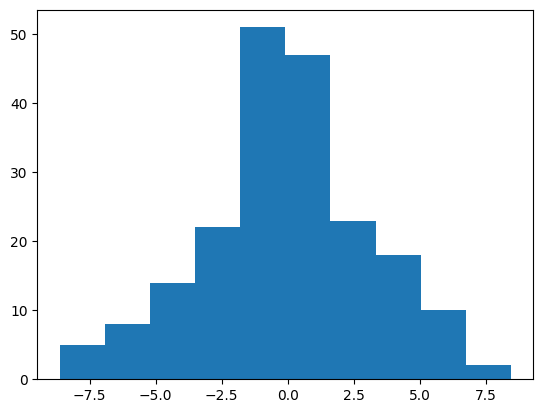

In [31]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

# Error estandar de los residuos
plt.hist(lm2.resid)
# Ahora los residuos estan incluso mas normalmente distribuidos

In [33]:
SSD = sum((data["Sales"]-sales_pred)**2)
SSD

1918.561811896827

In [37]:
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

3.120719860252885

In [39]:
error = RSE/np.mean(data["Sales"])
error

0.2225508903728212

In [40]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           3.95e-45
Time:                        20:41:40   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Conclusion añaadir Newspaper al modelo no mejora el modelo
# Ahora vamos a añadir la variable Radio al modelo

lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.83e-98
Time:                        20:44:01   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.6813609125080013

In [45]:
error = RSE/np.mean(data["Sales"])
error
# Cuando añadimos la variable radio, el error se reduce a la mitad, en este caso el modelo mejora
# El modelo puede explicar el 90% de la variabilidad de las ventas

0.11990450436855063

In [50]:
# Si agregamos las 3 variables al modelo, el modelo podria ser mejor
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()

sales_pred = lm4.predict(data[["TV", "Radio", "Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.6812269856174875

In [48]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        20:46:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# CONCLUSION: El mejor modelo es el que tiene las variables Radio y TV para predecir las ventas
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.83e-98
Time:                        20:47:25   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicolienalidad

La multicolienalidad es la razón de porque nuestro modelo se comporte sub optimamente. La multicolinalidad hace referencia a la correlación entre variables predictoras del modelo. 

Este es un problema muy comun en la regresión. En este caso el periodico esta correlacionado con la radio, esto es un problema ya que el periodico **racciona negativamente con la radio**.

Para esto se puede usar un estadistico T. Se calcula dividiendo por el error, si este valor sube, el T estadistico baja y el p-valor se incrementa. 

Las probabilidades para que la hipotesis nula del modelo al incluir esta variable aumenta.

En este caso la colienalidad es un problema que se debe tener en cuenta para poder tratarlo correctamente. 


In [51]:
# Newspaper nos da problema en relacion a radio
# Por lo tanto tenemos que calcular el VIF para ver si hay multicolinealidad
# VIF = 1: Las variables no estan correlacionadas
# VIF < 5: Las variables tienen una correlacion moderada y se pueden quedar en el modelo
# VIF > 5: Las variables estan altamente correlacionadas y deben desaparecer del modelo
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
VIF = 1/(1-lm_n.rsquared)
VIF

1.1451873787239286

In [52]:
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
VIF = 1/(1-lm_tv.rsquared)
VIF

1.00461078493965

In [54]:
lm_r = smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
VIF = 1/(1-lm_r.rsquared)
VIF

1.1449519171055351

Como radio y periodico éstan correlacionadas es de esperar a que el indice **VIF** sea mas grande ellos.

## Validando nuestro modelo

Cualquier modelo predictivo que creemos debe ser validado parfa ver como se comporta en el conjunto de datos. Para comprobar si tenemos un problema de overfitting, tenemos que saber si el modelo se ajusta **demasiado bien** al conjunto de datos que tenemos,y no es capaz de predecir elementos que no estén dentro del dataset. 


In [59]:
# Primera parte dividir el dataset en entrenamiento y test
def split_train_test(data, test_ratio, seed=42):
    np.random.seed(seed)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.2)

print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 160
Rows in test set: 40



In [60]:
lm = smf.ols(formula="Sales~TV+Radio", data=train_set).fit()
sales_pred = lm.predict(test_set[["TV", "Radio"]])
SSD = sum((test_set["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(test_set)-2-1))
RSE

1.841840445320886

In [61]:
# Validando en el conjunto de prueba
test_pred = lm.predict(test_set[["TV", "Radio"]])
SSD = sum((test_set["Sales"]-test_pred)**2)
RSE = np.sqrt(SSD/(len(test_set)-2-1))
RSE

1.841840445320886

In [65]:
# El modelo no sufre de overfitting es un modelo general
# Y es un modelo bastante bueno para predecir las ventas
rse = lambda data, pred: np.sqrt(sum((data-pred)**2)/len(data))
# Resumen de los modelos
modelo1 = smf.ols(formula="Sales~TV", data=data).fit()
modelo2 = smf.ols(formula="Sales~Newspaper", data=data).fit()
modelo3 = smf.ols(formula="Sales~Radio", data=data).fit()
modelo4 = smf.ols(formula="Sales~TV+Radio", data=data).fit()
modelo5 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()
modelo6 = smf.ols(formula="Sales~Radio+Newspaper", data=data).fit()
modelo7 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()



dataframe = {
    "Nombre": ["Modelo 1", "Modelo 2", "Modelo 3", "Modelo 4", "Modelo 5", "Modelo 6", "Modelo 7"],
    "Formula": ["Sales~TV", "Sales~Newspaper", "Sales~Radio", "Sales~TV+Radio", "Sales~TV+Newspaper", "Sales~Radio+Newspaper", "Sales~TV+Radio+Newspaper"],
    "R2": [modelo1.rsquared, modelo2.rsquared, modelo3.rsquared, modelo4.rsquared, modelo5.rsquared, modelo6.rsquared, modelo7.rsquared],
    "R2 ajustado": [modelo1.rsquared_adj, modelo2.rsquared_adj, modelo3.rsquared_adj, modelo4.rsquared_adj, modelo5.rsquared_adj, modelo6.rsquared_adj, modelo7.rsquared_adj],
    "Estadistico F": [modelo1.fvalue, modelo2.fvalue, modelo3.fvalue, modelo4.fvalue, modelo5.fvalue, modelo6.fvalue, modelo7.fvalue],
    "p-valor": [modelo1.f_pvalue, modelo2.f_pvalue, modelo3.f_pvalue, modelo4.f_pvalue, modelo5.f_pvalue, modelo6.f_pvalue, modelo7.f_pvalue],
    "RSE": [rse(data["Sales"], modelo1.fittedvalues), rse(data["Sales"], modelo2.fittedvalues), rse(data["Sales"], modelo3.fittedvalues), rse(data["Sales"], modelo4.fittedvalues), rse(data["Sales"], modelo5.fittedvalues), rse(data["Sales"], modelo6.fittedvalues), rse(data["Sales"], modelo7.fittedvalues)],
    "Error %": [rse(data["Sales"], modelo1.fittedvalues)/np.mean(data["Sales"]), rse(data["Sales"], modelo2.fittedvalues)/np.mean(data["Sales"]), rse(data["Sales"], modelo3.fittedvalues)/np.mean(data["Sales"]), rse(data["Sales"], modelo4.fittedvalues)/np.mean(data["Sales"]), rse(data["Sales"], modelo5.fittedvalues)/np.mean(data["Sales"]), rse(data["Sales"], modelo6.fittedvalues)/np.mean(data["Sales"]), rse(data["Sales"], modelo7.fittedvalues)/np.mean(data["Sales"])]
}

df = pd.DataFrame(dataframe)
df

,Nombre,Formula,R2,R2 ajustado,Estadistico F,p-valor,RSE,Error %
0,Modelo 1,Sales~TV,0.611875,0.609915,312.144994,1.467390e-42,3.242322,0.231223
1,Modelo 2,Sales~Newspaper,0.052120,0.047333,10.887299,1.148196e-03,5.066954,0.361345
2,Modelo 3,Sales~Radio,0.332032,0.328659,98.421588,4.354966e-19,4.253516,0.303335
3,Modelo 4,Sales~TV+Radio,0.897194,0.896151,859.617718,4.827362e-98,1.668703,0.119002
4,Modelo 5,Sales~TV+Newspaper,0.645835,0.642240,179.619344,3.950899e-45,3.097226,0.220875
5,Modelo 6,Sales~Radio+Newspaper,0.332705,0.325931,49.110917,4.957908e-18,4.251373,0.303182
6,Modelo 7,Sales~TV+Radio+Newspaper,0.897211,0.895637,570.270704,1.575227e-96,1.668570,0.118992


In [74]:
# Scikit learn tiene metodos automaticos para la seleccion de variables
# Por ejemplo Recursive Feature Elimination (RFE)
# RFE es un algoritmo de seleccion de variables que funciona de la siguiente manera:
# 1. Se entrena un modelo con todas las variables
# 2. Se calcula el coeficiente de cada variable y se ordenan de mayor a menor
# 3. Se elimina la variable con el coeficiente mas bajo
# 4. Se entrena un nuevo modelo con las variables restantes
# 5. Se repite el proceso hasta que se cumpla una condicion de parada
# En este caso la condicion de parada es que el modelo tenga un R2 ajustado mayor a 0.9
# El modelo que se entrena es un modelo de regresion lineal
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


X = data[["TV", "Radio", "Newspaper"]]
Y = data["Sales"]

estimator = SVR(kernel="linear")
selector = RFE(estimator, step=1)
selector = selector.fit(X, Y)
# Variables seleccionadas
selector.support_

# Solo se tuvo en cuenta la variable Radio debido a que la variable Newspaper y TV no eran significativas
selector.ranking_

X = data[["Radio"]]
lm = LinearRegression()
lm.fit(X, Y)

0.33203245544529525

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


# Variables categoricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [2]:
# Creamos dummy variables para las variables categoricas
# Esto nos permite convertir las variables categoricas en variables numericas
# Y tambien evita que el modelo asuma una relacion entre las variables categoricas
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City')

# Vamos a hacer un join
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)

df_new.head()

feaute_cols_diff = set(df_new.columns.values.tolist()) - {"Transaction ID", "Age", "Items", "Transaction Time", "Record", "Gender", "City Tier", "Total Spend"}
X = df_new[list(feaute_cols_diff)]
y = df_new["Total Spend"]

lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [3]:
print("Alpha: ", lm.intercept_)
print("\nBeta coeficients: ")
for col, coef in zip(feaute_cols_diff, lm.coef_):
    print(col, ": ", coef)

Alpha:  3079.301459970521

Beta coeficients: 
Gender_Female :  -96.3185402289076
Age  :  6.80168170808071
City_Tier 1 :  111.71440804079954
City_Tier 3 :  -89.4702973755135
Gender_Male :  96.3185402289082
 Items  :  46.348350706007984
City_Tier 2 :  -22.244110665286048
Monthly Income :  0.15298161912546782


In [4]:
lm.score(X, y)

0.20055957331023966

In [6]:
# Modelo 2 añadiendo la variable record
feaute_cols_diff = set(df_new.columns.values.tolist()) - {"Transaction ID", "Age", "Items", "Transaction Time", "Gender", "City Tier", "Total Spend"}
X = df_new[list(feaute_cols_diff)]
lm2 = LinearRegression()
lm2.fit(X, y)
lm2.score(X, y) # Mejora muchisimo el modelo

0.9220597036696562

In [7]:
df["predict"] = lm2.predict(X)
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,predict
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,4969.877698
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,4756.153300
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,5262.742177
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,8258.417056
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,3484.456796


1442458709.5489302
784.6311593006678
0.12730954078592974


(array([140., 242.,  16., 237., 160., 184., 254., 407., 606., 116.]),
 array([-1717.5344405 , -1428.1569778 , -1138.77951509,  -849.40205238,
         -560.02458968,  -270.64712697,    18.73033573,   308.10779844,
          597.48526115,   886.86272385,  1176.24018656]),
 <BarContainer object of 10 artists>)

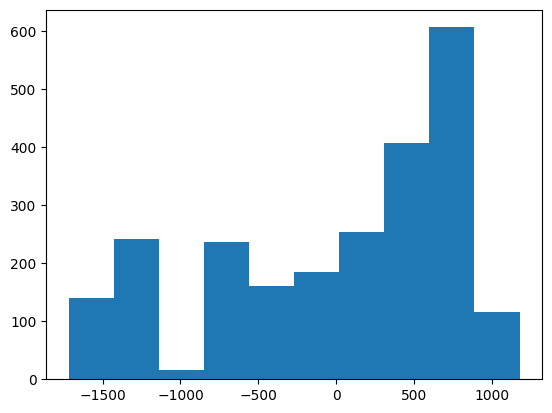

In [8]:
SSD = np.sum((df["predict"] - df["Total Spend"])**2)
RSE = np.sqrt(SSD/(len(df)-len(feaute_cols_diff)-len(feaute_cols_diff)-1))
error = RSE/np.mean(df["Total Spend"])
print(SSD)
print(RSE)
print(error)
# Un 12% de los datos no pueden ser explicados por el modelo

import matplotlib.pyplot as plt
# Para graficar los residuos
plt.hist(df["predict"] - df["Total Spend"])

In [29]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

X = df_new[list(feaute_cols_diff)]
Y = df_new["Total Spend"]

estimator = LinearRegression()
selector = RFECV(estimator)
selector = selector.fit(X, Y)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [31]:
mask = selector.support_
# Seleccionar las variables contrarias a la mascara
new_features = X.columns[mask]
X_new = X[new_features]
lm3 = LinearRegression()
lm3.fit(X_new, Y)
lm3.score(X_new, Y)

0.9220597036696562

In [40]:
# Enmascarado de las variables dummy
# Siempre podemos eliminar una de las variables dummy 
# Y asi simplificar el modelo
dummy_gender = pd.get_dummies(df['Gender'], prefix="Gender").iloc[:, 1:]
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix="City").iloc[:, 1:]
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender).join(dummy_city_tier)
feaute_cols_diff = set(df_new.columns.values.tolist()) - {"Transaction ID", "Age", "Items", "Transaction Time", "Gender", "City Tier", "Total Spend"}

X = df_new[list(feaute_cols_diff)]
Y = df_new["Total Spend"]

lm4 = LinearRegression()
lm4.fit(X, Y)
lm4.score(X, Y)

# El rendimiento del modelo se mantiene igual

0.9220597036696562

In [38]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,predict,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,4969.877698,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,4756.153300,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,5262.742177,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,8258.417056,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,3484.456796,0,1,0


In [3]:
# Transformaciones de variables con una relación no lineal.

# Para saber si una variable tiene una relacion no lineal, lo que podemos hacer es graficarla
# Si la relacion es lineal, la grafica sera una linea recta
# Si la relacion es no lineal, la grafica sera una curva

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/auto/auto-mpg.csv")
# El dataset contiene informacion sobre los autos de los años 70 y 80
# mpg: millas por galon
# cylinders: numero de cilindros
# displacement: desplazamiento
# horsepower: caballos de fuerza
# weight: peso
# acceleration: aceleracion
# model year: año del modelo
# origin: origen
# car name: nombre del auto
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


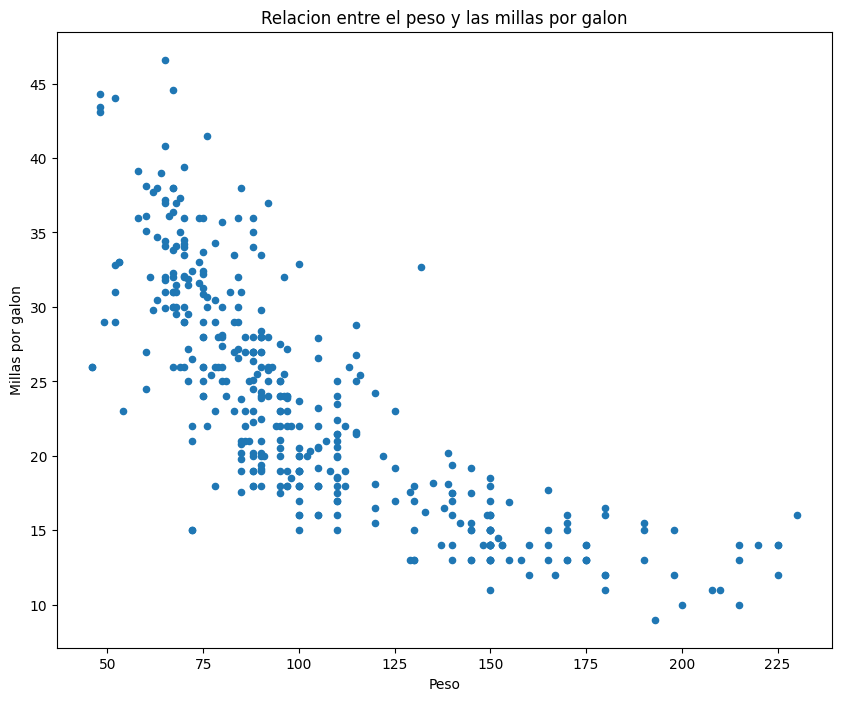

/tmp/ipykernel_26433/3238997138.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(X[:, np.newaxis], Y)


LinearRegression()

In [46]:
# Graficamos la relacion entre el peso y las millas por galon
data = df[["mpg", "horsepower"]]
data.plot(kind="scatter", x="horsepower", y="mpg", figsize=(10, 8))
plt.title("Relacion entre el peso y las millas por galon")
plt.xlabel("Peso")
plt.ylabel("Millas por galon")
plt.show()

# La relación parece ser no lineal, sino que tiene una forma mas bien curva
# primero podemos ajustar un modelo de regresion lineal
# Y ver que tan bien se ajusta

import numpy as np
from sklearn.linear_model import LinearRegression

X = df["horsepower"].fillna(df["horsepower"].mean())
Y = df["mpg"].fillna(df["mpg"].mean())

lm = LinearRegression()
lm.fit(X[:, np.newaxis], Y)

/tmp/ipykernel_26433/4278930767.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.score(X[:, np.newaxis], Y)
/tmp/ipykernel_26433/4278930767.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, lm.predict(X[:, np.newaxis]), color="red", linewidth=3)


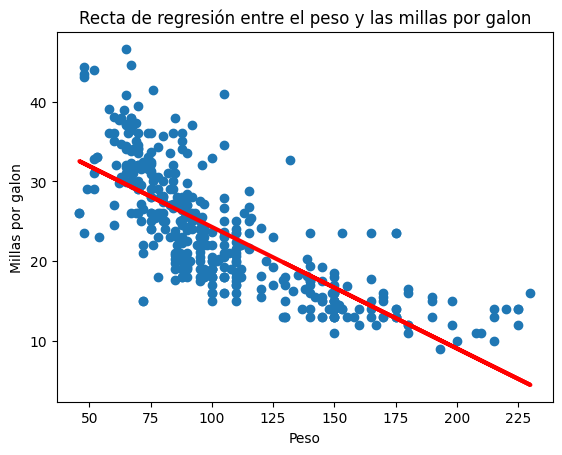

10315.751960060918
5.046879480825511
0.21462773361633472


/tmp/ipykernel_26433/4278930767.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  SSD = np.sum((Y - lm.predict(X[:, np.newaxis]))**2)


In [10]:
lm.score(X[:, np.newaxis], Y)
# El rendimiento no es muy bueno (0.57)
# Esto se debe a que la relacion entre las variables es no lineal
# Por lo tanto el modelo no puede explicar bien la relacion entre las variables

# Grafiacmos la linea de regresion
plt.plot(X, lm.predict(X[:, np.newaxis]), color="red", linewidth=3)
plt.scatter(X, Y)
plt.title("Recta de regresión entre el peso y las millas por galon")
plt.xlabel("Peso")
plt.ylabel("Millas por galon")
plt.show()

# Obtenemos una relacion inversa entre las variables
# Pero la linea de regresión no ajusta bien los datos

SSD = np.sum((Y - lm.predict(X[:, np.newaxis]))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
print(SSD)
print(RSE)
print(error)

/tmp/ipykernel_26433/215671182.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm2.fit(X_data[:, np.newaxis], Y_data)
/tmp/ipykernel_26433/215671182.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm2.score(X_data[:, np.newaxis], Y_data)
/tmp/ipykernel_26433/215671182.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X_data, lm2.predict(X_data[:, np.newaxis]), color="red", linewidth=3)


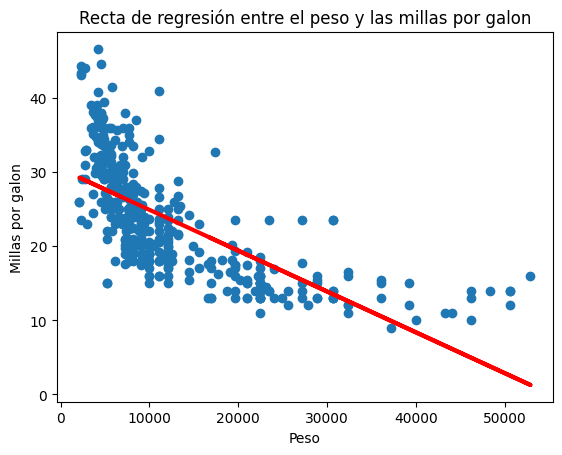

In [12]:
# Podemos hacer un modelo de regresion cuadratica
# Lo que permite ajustar una relacion no lineal
# Para ello, podemos crear una nueva variable que sea el cuadrado de la variable horsepower

X_data = X**2
Y_data = Y

lm2 = LinearRegression()
lm2.fit(X_data[:, np.newaxis], Y_data)

lm2.score(X_data[:, np.newaxis], Y_data)

# El rendimiento empeora un poco 
# Esto se debe a que la relacion entre las variables es no lineal
plt.plot(X_data, lm2.predict(X_data[:, np.newaxis]), color="red", linewidth=3)
plt.scatter(X_data, Y_data)
plt.title("Recta de regresión entre el peso y las millas por galon")
plt.xlabel("Peso")
plt.ylabel("Millas por galon")
plt.show()

In [22]:
# Modelo de regresión lineal y cuadrático
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


# En este caso vamos a crear un modelo de regresion lineal y cuadratica
# Para ello, vamos a crear una variable que sea el cuadrado de la variable horsepower
# Y vamos a crear un modelo de regresion lineal con esta variable
poly = PolynomialFeatures(degree=2)
X_data = poly.fit_transform(X[:, np.newaxis])

# Ahora vamos a hacer el otro modelo de regresion lineal
# Pero esta vez con la variable horsepower
lm4 = linear_model.LinearRegression()
lm4.fit(X_data, Y)

lm4.score(X_data, Y)

/tmp/ipykernel_26433/184446539.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])


0.6439066584257469

# El problema de los outliers

Los outliers son datos que estan alejados de la tendencia central de los datos, si hicieramos un grafico de los datos, los outliers estan alejados de la nube de puntos, tenemos que encargarnos de los outliers si los outliers realmente afectan el rendimiento del modelo. 

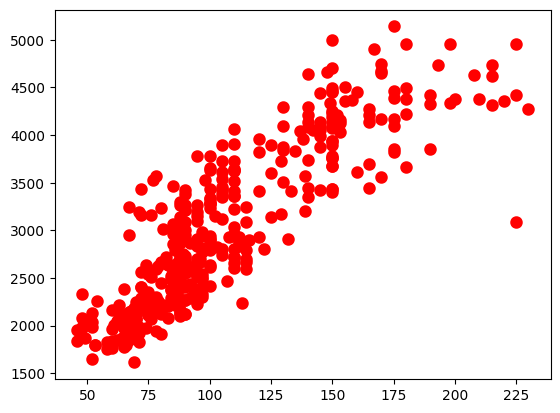

In [49]:
plt.scatter(df["horsepower"], df["weight"], color="red", linewidth=3)

En este caso todos los puntos parecen agrupados excepto algunos como el que esta en el X: 225, que ese punto parece estar bastante alejado de la nube de puntos. Los puntos alejados de la masa general, puede causarnos problemas para el modelado, por lo tanto cuando se hace un modelo lineal con daos que se ven así, primero se hace un modelo de regresión con los outliers, y luego se compara con un modelo quitando los outliers del dataset. 

/tmp/ipykernel_26433/2341771399.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(X[:, np.newaxis], Y)
/tmp/ipykernel_26433/2341771399.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.score(X[:, np.newaxis], Y)
/tmp/ipykernel_26433/2341771399.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, lm.predict(X[:, np.newaxis]), color="blue", linewidth=3)


Text(0, 0.5, 'Millas por galon')

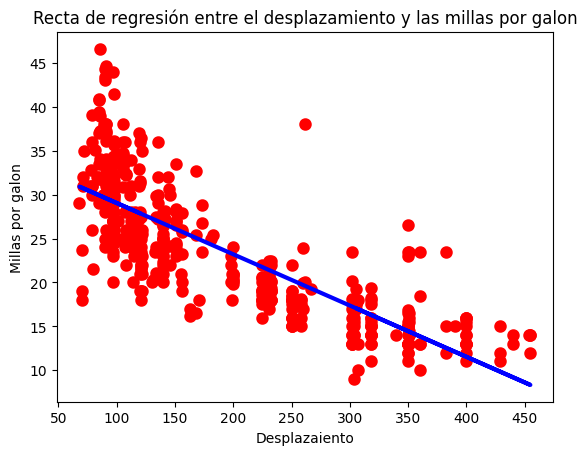

In [57]:
lm = LinearRegression()
X = df["displacement"].fillna(df["displacement"].mean())
Y = df["mpg"].fillna(df["mpg"].mean())
lm.fit(X[:, np.newaxis], Y)
lm.score(X[:, np.newaxis], Y)

plt.plot(X, lm.predict(X[:, np.newaxis]), color="blue", linewidth=3)
plt.scatter(X, Y, color="red", linewidth=3)
plt.title("Recta de regresión entre el desplazamiento y las millas por galon")
plt.xlabel("Desplazaiento")
plt.ylabel("Millas por galon")


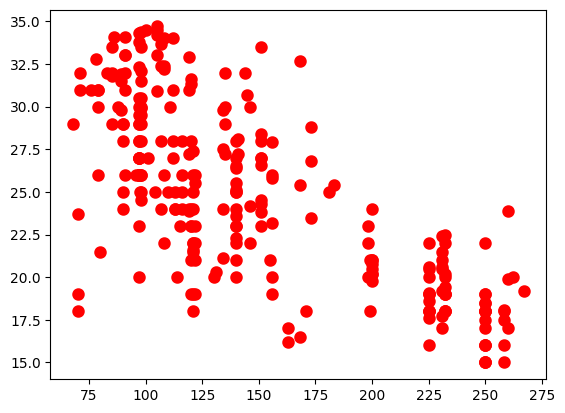

In [71]:
# Quitamos los outliers
df_auto = df.query("displacement < 300 & mpg < 35")

X = df_auto["displacement"].fillna(df_auto["displacement"].mean())
Y = df_auto["mpg"].fillna(df_auto["mpg"].mean())

plt.scatter(X, Y, color="red", linewidth=3)


In [72]:
lm2 = LinearRegression()
lm2.fit(X[:, np.newaxis], Y)
lm2.score(X[:, np.newaxis], Y)



/tmp/ipykernel_26433/2232332051.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm2.fit(X[:, np.newaxis], Y)
/tmp/ipykernel_26433/2232332051.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm2.score(X[:, np.newaxis], Y)


0.5279921111912234